# Social circles: Facebook

In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
# 文件为 'facebook_combined.txt', 格式每行为两个用户ID，代表他们是好友
data = pd.read_csv('facebook_combined.txt', header=None, delim_whitespace=True)

# 合并两列，因为关系是无向的
all_relationships = pd.concat([data[0], data[1]]).unique()

# 创建每个用户的好友列表（事务）
user_friends = {}
for index, row in data.iterrows():
    user_friends.setdefault(row[0], set()).add(row[1])
    user_friends.setdefault(row[1], set()).add(row[0])  # 无向边，所以要添加两次

# 转换成列表格式，每个列表项是一个用户的好友集合
transactions = [list(friends) for friends in user_friends.values()]

# 独热编码
encoder = TransactionEncoder()
encoded_array = encoder.fit_transform(transactions)
df = pd.DataFrame(encoded_array, columns=encoder.columns_)


C:\Users\86173\AppData\Local\Temp\ipykernel_40060\3131888521.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('facebook_combined.txt', header=None, delim_whitespace=True)


In [9]:
# 频繁项集挖掘
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# 生成关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)


# 分析结果
print(frequent_itemsets.head())
print(rules.head())

    support itemsets
0  0.085912      (0)
1  0.258727    (107)
2  0.056697    (348)
3  0.057192    (483)
4  0.050755   (1086)
  antecedents consequents  antecedent support  consequent support   support  \
0       (107)      (1086)            0.258727            0.050755  0.050508   
1      (1086)       (107)            0.050755            0.258727  0.050508   
2       (107)      (1199)            0.258727            0.053726  0.053479   
3      (1199)       (107)            0.053726            0.258727  0.053479   
4      (1352)       (107)            0.057935            0.258727  0.057688   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.195215  3.846218  0.037376    1.179502       0.998289  
1    0.995122  3.846218  0.037376  151.960881       0.779572  
2    0.206699  3.847260  0.039578    1.192830       0.998384  
3    0.995392  3.847260  0.039578  160.856153       0.782094  
4    0.995726  3.848554  0.042698  173.457787       0.785681  


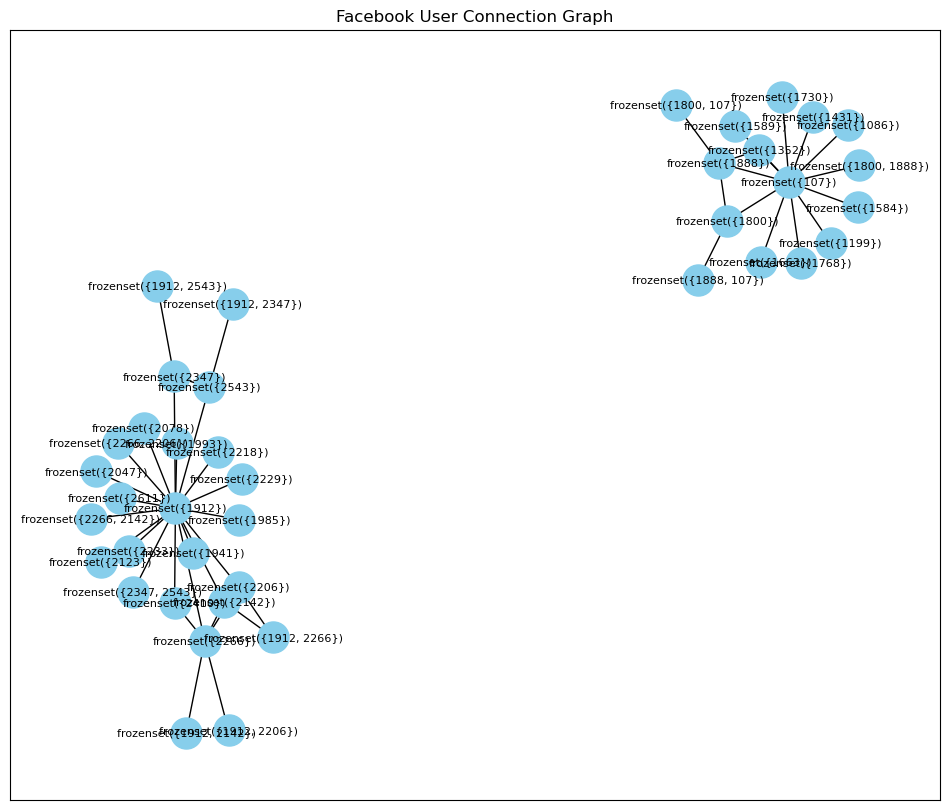

In [11]:
# 可视化结果
fig, ax = plt.subplots(figsize=(12, 10))
GA = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
nx.draw_networkx(GA, ax=ax, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title('Facebook User Connection Graph')
plt.show()

我们使用的是 Facebook用户的连接数据。具体来说，我们是在找出哪些用户经常一起出现在其他用户的关注列表中，这可以帮助我们识别社交圈子或者影响力群体。

预处理：
我们首先将数据读取为一个列表，其中每个元素是一个元组，表示一个用户关注另一个用户。
接着，我们将这些关注关系转换为事务数据。每个事务代表一个用户所关注的所有用户的集合。
独热编码：
为了使用 apriori 算法，我们需要将事务数据转换为独热编码格式。这意味着每个用户都被表示为一个列，如果在某个事务（即某个用户的关注列表）中出现了该用户，那么相应的列就为 True，否则为 False。
频繁项集生成：
使用 apriori 算法从独热编码的数据中找出频繁项集。频繁项集是指那些在数据集中频繁出现的用户集合，这些集合出现的频率高于我们设定的阈值（min_support）。
关联规则挖掘：
从频繁项集中生成关联规则。关联规则表示为“如果关注了用户A，那么也可能关注用户B”。我们使用置信度（confidence）来衡量规则的强度，它告诉我们在关注了规则左侧的用户的情况下，有多大比例的人也关注了规则右侧的用户。
可视化：
使用网络图来可视化这些关联规则，节点表示用户，边表示频繁的关联规则。这有助于我们直观地看到哪些用户间存在较强的连接关系。

分析应用：
社区发现：通过识别频繁共同出现的用户群，我们可以找到紧密相连的用户社区或群组。
影响力分析：确定哪些用户在网络中具有中心地位，可能影响其他用户。
推荐系统：在推荐关注用户时，可以利用发现的模式推荐那些经常一起被关注的用户。

## 将该模式命名为关联用户模式

In [12]:
import os
import pyfpgrowth

In [13]:
# Step 1: Load all .edges files from the folder
folder_path = 'facebook'  # Update this to your folder path
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.edges')]
transactions = []

for file in all_files:
    df = pd.read_csv(file, delim_whitespace=True, header=None, names=['source', 'target'])
    for index, row in df.iterrows():
        transactions.append([str(row['source']), str(row['target'])])

# Step 2: Find frequent patterns
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)  # Adjust the support threshold as necessary

# Step 3: Visualize the graph (simplified for performance)
G = nx.DiGraph()
for edge in transactions:
    G.add_edge(edge[0], edge[1])

C:\Users\86173\AppData\Local\Temp\ipykernel_40060\321700998.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=['source', 'target'])
C:\Users\86173\AppData\Local\Temp\ipykernel_40060\321700998.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=['source', 'target'])
C:\Users\86173\AppData\Local\Temp\ipykernel_40060\321700998.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, header=None, names=['source', 'target'])
C:\Users\86173\AppData\Local\Temp\ipykernel_40060\321700998.py:7: FutureWarning: The 'delim_whitespace' keywo

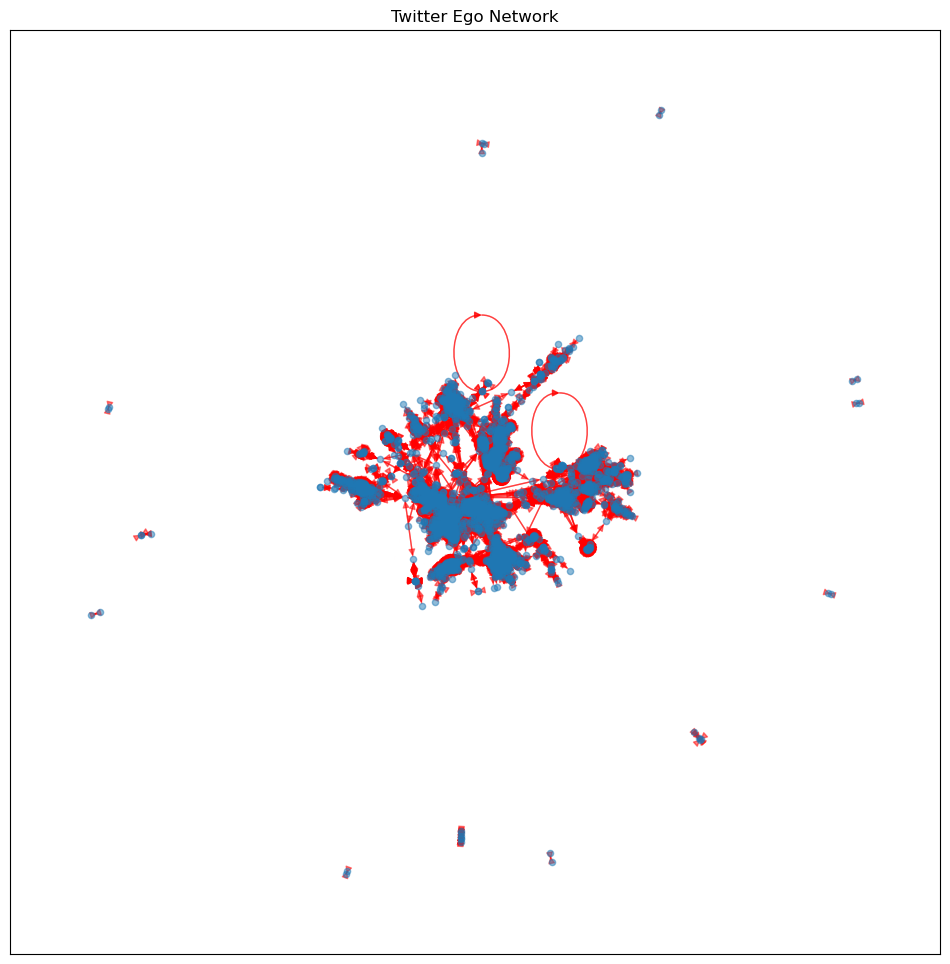

In [15]:
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=20, alpha=0.5, edge_color='r')
plt.title('Twitter Ego Network')
plt.show()

步骤概述

1. 数据加载和合并:

目的: 加载文件夹中所有以特定节点ID前缀开头的.edges文件，并将它们合并成一个单一的数据集。
实现:
os.listdir(folder_path)：列出指定文件夹下的所有文件。
os.path.join(folder_path, f)：构建每个文件的完整路径。
pd.read_csv(file, delim_whitespace=True, header=None, names=['source', 'target'])：读取每个文件，文件中的每一行包含两个节点，表示一个有向边。

2. 构建图和分析局部模式:

目的: 使用网络分析库NetworkX构建图形，分析节点的连接性，并识别图中的高度集中的子图。
实现:
nx.from_pandas_edgelist(data, 'source', 'target', create_using=nx.DiGraph())：使用Pandas DataFrame中的数据创建一个有向图。
nx.degree_centrality(G)：计算图中每个节点的中心性，中心性高意味着一个节点有更多的直接连接。
G.subgraph(high_degree_nodes)：从图中提取出中心性高的节点，这些节点可能在社交网络中扮演重要角色，如意见领袖或关键传播者。

3. 可视化:

目的: 可视化分析结果，帮助直观理解数据和分析。
实现:
plt.figure(figsize=(10, 10)) 和 nx.draw_networkx(...)：创建一个可视化图形，展示节点和它们之间的边，以便观察哪些节点在网络中占据中心位置。
目的和意义
通过上述代码，我们能够对一个特定的社交网络数据集（比如Twitter或Facebook的用户关系数据）进行局部模式分析。特别是，我们关注那些具有高度连接性的节点，这些节点在社交网络分析中往往具有重要意义：

意见领袖识别：在营销和信息传播研究中，识别能影响其他用户的关键节点（意见领袖）非常重要。
社区检测：通过识别连接紧密的节点群组，可以帮助我们理解社交网络中的社区结构。
信息流分析：了解信息如何在网络中流动，哪些节点在信息传播中起到桥梁作用。

## 将该模式命名为领袖模式

In [35]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

In [36]:
# 定义文件夹路径
folder_path = 'facebook'

# 读取一个圈子文件的内容
def read_circles(file_path):
    circles = []
    with open(file_path, 'r') as file:
        for line in file:
            circle = line.strip().split()[1:]  # 忽略圈子名称
            if circle:
                circles.append(circle)
    return circles

# 遍历文件夹读取所有圈子文件
def read_all_circles(folder_path):
    all_circles = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.circles'):
            full_path = os.path.join(folder_path, filename)
            circles = read_circles(full_path)
            all_circles.extend(circles)
    return all_circles

# 频繁模式挖掘
def frequent_patterns(circles, min_support=0.04):
    te = TransactionEncoder()
    te_ary = te.fit(circles).transform(circles)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets


# 使用网络图可视化频繁项集之间的关联
def visualize_frequent_patterns_with_network(frequent_itemsets, min_support=0.05):
    # 创建图对象
    G = nx.Graph()

    # 添加节点和边
    for index, row in frequent_itemsets.iterrows():
        # 为每个项集添加节点
        for item in row['itemsets']:
            G.add_node(item)

        # 为每对项集添加边，边的权重为支持度
        for (item1, item2) in combinations(row['itemsets'], 2):
            if G.has_edge(item1, item2):
                # 如果边已存在，增加权重
                G[item1][item2]['weight'] += row['support']
            else:
                # 添加新边
                G.add_edge(item1, item2, weight=row['support'])

    # 根据边的权重调整边的宽度
    edge_width = [G[u][v]['weight'] * 10 for u, v in G.edges()]

    # 绘制图形
    pos = nx.spring_layout(G, seed=42)  # 为了美观，使用spring布局
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='k', width=edge_width)
    plt.title('Network of Frequent Itemsets')
    plt.show()

In [37]:
# 处理所有文件
all_circles = read_all_circles(folder_path)
frequent_itemsets = frequent_patterns(all_circles)
print(frequent_itemsets)

     support    itemsets
0   0.046632       (428)
1   0.072539       (563)
2   0.046632       (697)
3   0.051813       (698)
4   0.041451       (705)
5   0.046632       (708)
6   0.041451       (747)
7   0.041451       (774)
8   0.041451       (798)
9   0.041451       (823)
10  0.051813       (856)
11  0.046632  (563, 428)
12  0.041451  (697, 708)


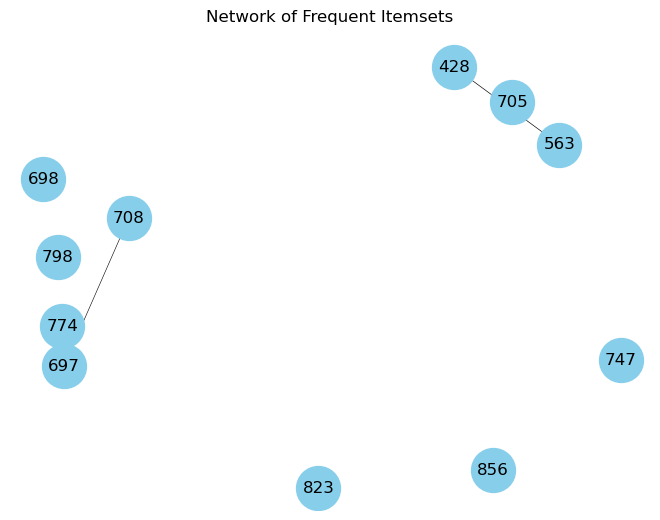

In [38]:
# 可视化
visualize_frequent_patterns_with_network(frequent_itemsets)

使用Apriori算法来识别那些频繁出现在一起的成员组合。这里，“频繁”是指组合出现的次数达到我们设定的支持度阈值。

首先，利用TransactionEncoder将圈子成员的列表转换成独热编码格式，这是Apriori算法处理的需要。然后，应用Apriori算法找出支持度不低于我们设定阈值的所有频繁项集。

输出的频繁项集和可视化结果揭示了哪些成员倾向于在多个圈子中共同出现。这可以帮助进一步分析这些成员之间可能存在的社交联系，或者这些成员在社交网络中的角色和影响力。

这个处理流程针对的是大规模的社交网络数据，通过上述步骤，我们可以有效地从大量复杂的社交圈子数据中提取出有意义的模式和关系。这种分析在社交网络研究、社区发现以及推荐系统等领域都有着广泛的应用。

## 将该模式命名为社区模式